<a href="https://colab.research.google.com/github/rouchi-11/Image_Processing/blob/main/Assignment_3/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Gray pixel values (50:60, 50:60):
 [[188 181 176 173 172 172 170 171 172 174]
 [192 187 183 182 182 182 191 190 189 186]
 [190 188 187 189 191 192 177 179 183 188]
 [177 176 177 180 183 185 185 185 186 186]
 [177 175 175 176 178 180 170 172 176 180]
 [196 192 190 190 191 192 199 196 192 187]
 [228 203 183 183 187 206 187 197 188 162]
 [233 227 224 223 210 211 205 200 189 174]
 [239 238 239 236 216 207 218 200 190 194]
 [243 239 236 235 221 220 217 194 183 194]]
Quantized (4 levels) pixel values:
 [[160 160 160 160 160 160 160 160 160 160]
 [224 160 160 160 160 160 160 160 160 160]
 [160 160 160 160 160 224 160 160 160 160]
 [160 160 160 160 160 160 160 160 160 160]
 [160 160 160 160 160 160 160 160 160 160]
 [224 224 160 160 160 224 224 224 224 160]
 [224 224 160 160 160 224 160 224 160 160]
 [224 224 224 224 224 224 224 224 160 160]
 [224 224 224 224 224 224 224 224 160 224]
 [224 224 224 224 224 224 224 224 160 224]]


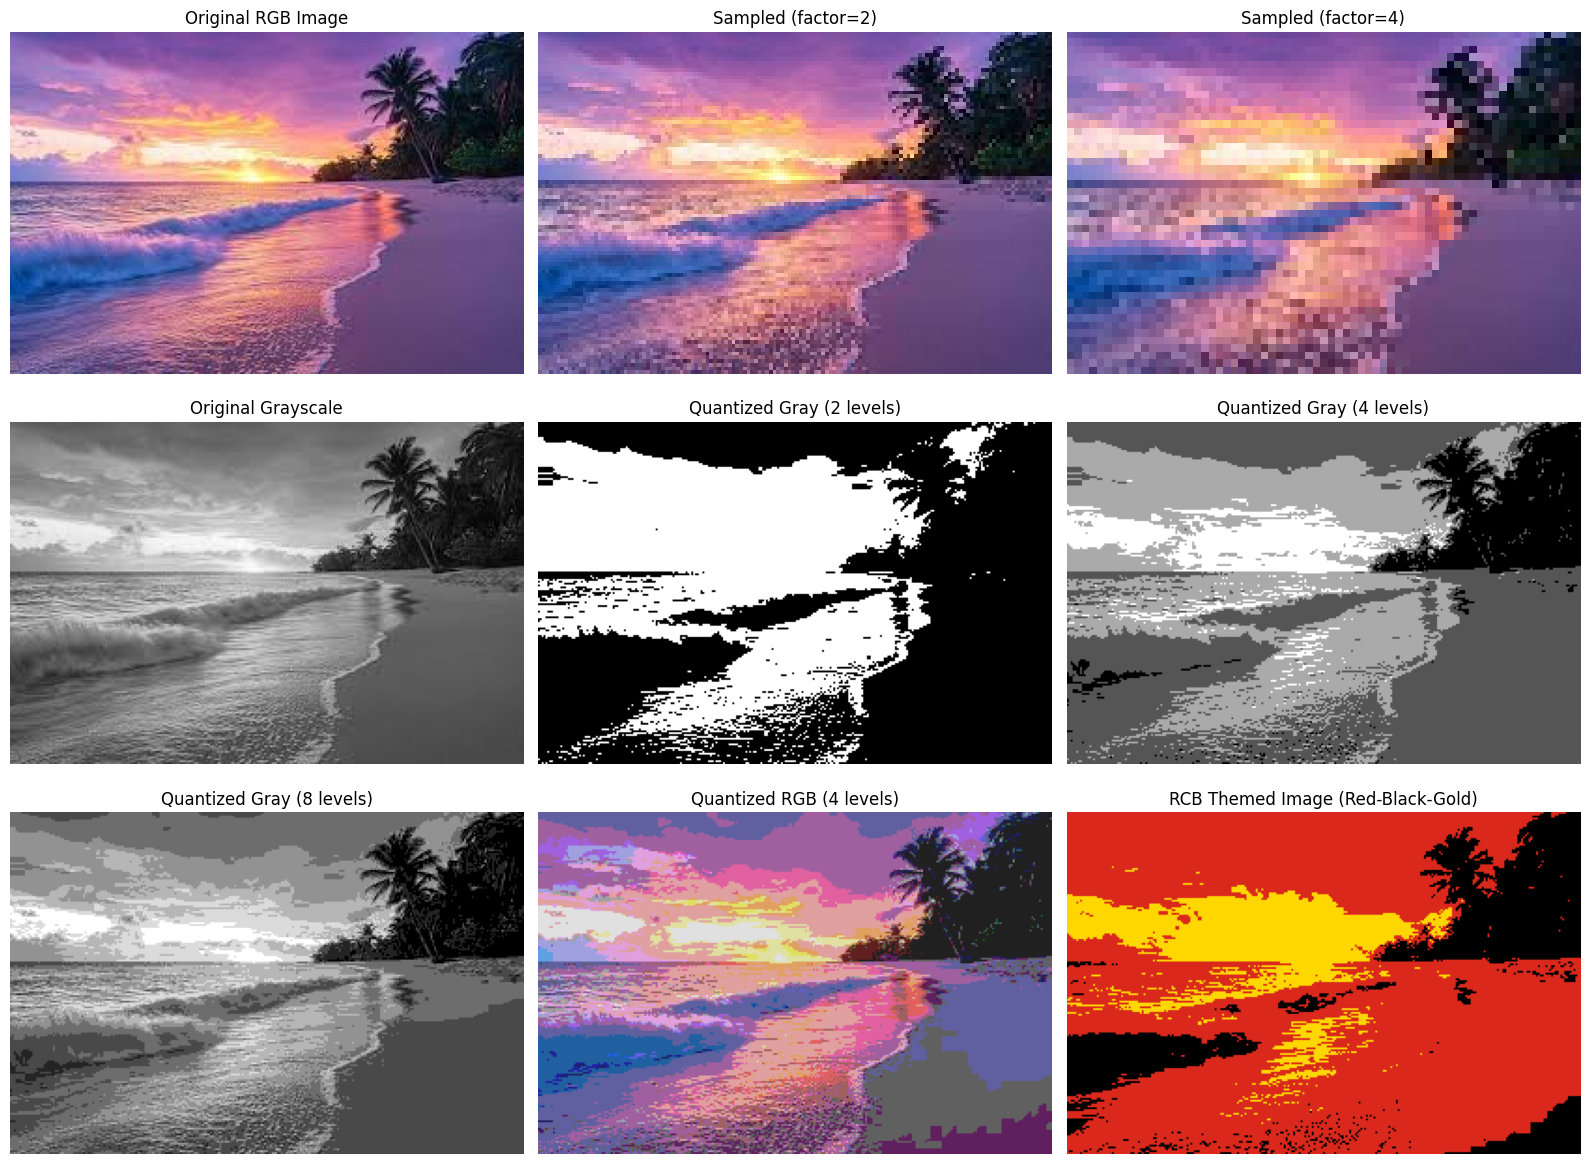

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_sampling(img, factor):
    sampled = img[::factor, ::factor]
    return sampled

def image_quantization(img, levels):
    step = 256 // levels
    quantized = (img // step) * step + step // 2
    return np.uint8(quantized)

def rcb_quantization(img):
    rcb_colors = np.array([
        [218, 41, 28],   # Red
        [0, 0, 0],       # Black
        [255, 215, 0]    # Gold
    ])

    pixels = img.reshape(-1, 3)

    distances = np.linalg.norm(pixels[:, None] - rcb_colors[None, :], axis=2)
    nearest_idx = np.argmin(distances, axis=1)

    rcb_img = rcb_colors[nearest_idx].reshape(img.shape)
    return np.uint8(rcb_img)


img = cv2.imread("scene.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

sampled_2 = image_sampling(img, 2)
sampled_4 = image_sampling(img, 4)

quant_gray_2 = image_quantization(img_gray, 2)
quant_gray_4 = image_quantization(img_gray, 4)
quant_gray_8 = image_quantization(img_gray, 8)

quant_rgb_4 = image_quantization(img, 4)
quant_rgb_8 = image_quantization(img, 8)

rcb_img = rcb_quantization(img)

print("Original Gray pixel values (50:60, 50:60):\n", img_gray[50:60, 50:60])
print("Quantized (4 levels) pixel values:\n", quant_gray_4[50:60, 50:60])

plt.figure(figsize=(16, 12))

plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title("Original RGB Image")
plt.axis("off")

# Sampling results
plt.subplot(3, 3, 2)
plt.imshow(sampled_2)
plt.title("Sampled (factor=2)")
plt.axis("off")

plt.subplot(3, 3, 3)
plt.imshow(sampled_4)
plt.title("Sampled (factor=4)")
plt.axis("off")

# Quantization (Grayscale)
plt.subplot(3, 3, 4)
plt.imshow(img_gray, cmap="gray")
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(3, 3, 5)
plt.imshow(quant_gray_2, cmap="gray")
plt.title("Quantized Gray (2 levels)")
plt.axis("off")

plt.subplot(3, 3, 6)
plt.imshow(quant_gray_4, cmap="gray")
plt.title("Quantized Gray (4 levels)")
plt.axis("off")

plt.subplot(3, 3, 7)
plt.imshow(quant_gray_8, cmap="gray")
plt.title("Quantized Gray (8 levels)")
plt.axis("off")

# Quantization (RGB)
plt.subplot(3, 3, 8)
plt.imshow(quant_rgb_4)
plt.title("Quantized RGB (4 levels)")
plt.axis("off")

plt.subplot(3, 3, 9)
plt.imshow(rcb_img)
plt.title("RCB Themed Image (Red-Black-Gold)")
plt.axis("off")

plt.tight_layout()
plt.show()